# Bar Chart with Maximum Prices 

## Min and Max Prices Data

In [7]:
import pandas as pd

# Load the data
prices = pd.read_csv("on_off_peak_prices.csv", encoding="latin1")

# Replace 'year_round' with both 'summer' and 'winter'
prices_expanded = pd.concat([
    prices,
    prices[prices['season'] == 'year_round'].assign(season='summer'),
    prices[prices['season'] == 'year_round'].assign(season='winter')
])

# Group by 'iso/rto' and calculate the maximum values
result = prices_expanded.groupby('iso/rto').agg(
    max_winter_price=('w_price', 'max'),
    max_summer_price=('s_price', 'max'),
    max_penalty=('penalty', 'max')
).reset_index()

# Display the resulting dataset
print(result)

# Multiply relevant columns by 1000 to convert from dollars per kW to dollars per MW
result[['max_summer_price', 'max_winter_price', 'max_penalty']] = (
    result[['max_summer_price', 'max_winter_price', 'max_penalty']] * 1000
)

# Scale the prices to $1000 per MW
result[['max_summer_price', 'max_winter_price', 'max_penalty']] = (
    result[['max_summer_price', 'max_winter_price', 'max_penalty']] / 1000
)

# Display the updated dataset
print(result)

# Assign the processed DataFrame to a variable for further use
result_with_all_states = result

  iso/rto  max_winter_price  max_summer_price  max_penalty
0   CAISO               NaN             175.0          NaN
1   ERCOT               NaN              40.0          NaN
2   ISONE               NaN             200.0          NaN
3    MISO              35.0              35.0         50.0
4   NYISO               NaN              25.0          NaN
5     PJM              42.0              42.0          NaN
6     SPP              35.0              35.0         10.0
7   other              42.0              42.0         40.0
  iso/rto  max_winter_price  max_summer_price  max_penalty
0   CAISO               NaN             175.0          NaN
1   ERCOT               NaN              40.0          NaN
2   ISONE               NaN             200.0          NaN
3    MISO              35.0              35.0         50.0
4   NYISO               NaN              25.0          NaN
5     PJM              42.0              42.0          NaN
6     SPP              35.0              35.0         10

### By ISO/RTO

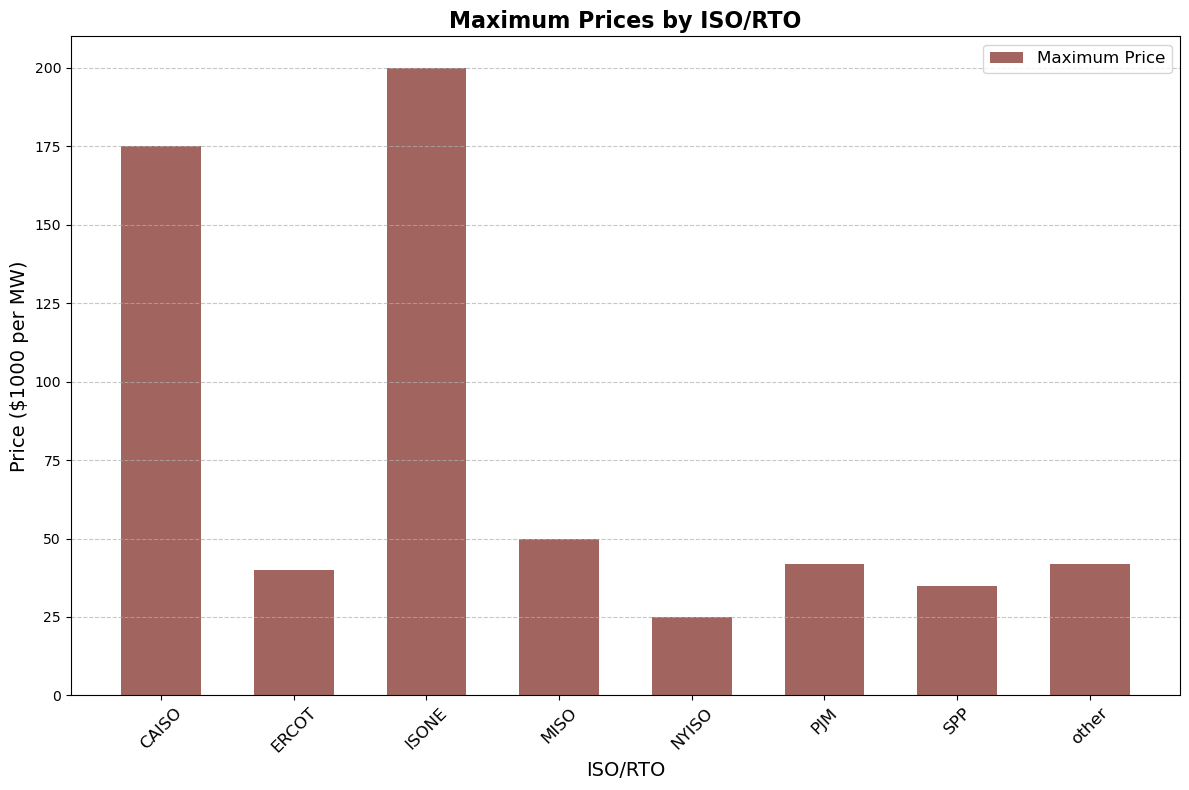

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Use the result_with_all_states DataFrame from the first cell
data = result_with_all_states

# Calculate the overall maximum price for each ISO/RTO
data['max_price'] = data[['max_summer_price', 'max_winter_price', 'max_penalty']].max(axis=1)

# Set the positions and width for the bars
x = np.arange(len(data['iso/rto']))  # the label locations
width = 0.6  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the bars for the maximum price
ax.bar(x, data['max_price'], width, color='#A1645E', label='Maximum Price')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('ISO/RTO', fontsize=14)
ax.set_ylabel('Price ($1000 per MW)', fontsize=14)
ax.set_title('Maximum Prices by ISO/RTO', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(data['iso/rto'], rotation=45, fontsize=12)
ax.legend(fontsize=12)

# Add gridlines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()